In [12]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt

df = pd.read_csv("./project-toyotacorolla-data/train.csv")
df.tail(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1016,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1017,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
dfy = df.ix[:, :3]
dfX = df.ix[:, 3:]
print(len(dfy.columns), len(dfX.columns))

3 36


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [14]:
# 7개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
# 29개 변수
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

print(len(cols_real), len(cols_cat))

7 29


In [15]:
dfX_real = dfX[cols_real]
dfX_cat = dfX[cols_cat]

print(len(dfX_real.columns), len(dfX_cat.columns))

7 29


In [16]:
df_real = pd.concat([dfy.Price, dfX_real], axis=1)
df_real.head()

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,2002,46986,90,210,1165,3
1,13750,23,2002,72937,90,210,1165,3
2,13750,30,2002,38500,90,210,1170,3
3,20950,25,2002,31461,192,100,1185,12
4,19600,25,2002,32189,192,100,1185,3


In [17]:
# Correlation Matrix of dfX_real
corrmat = df_real.corr()
corrmat

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
Price,1.000000,-0.883900,0.893302,-0.575962,0.314898,0.178874,0.557015,0.166141
Age_08_04,-0.883900,1.000000,-0.984218,0.516486,-0.164049,-0.172089,-0.463990,-0.166382
Mfg_Year,0.893302,-0.984218,1.000000,-0.517981,0.170122,0.173047,0.471215,0.160928
KM,-0.575962,0.516486,-0.517981,1.000000,-0.350617,0.289799,-0.011154,-0.136274
HP,0.314898,-0.164049,0.170122,-0.350617,1.000000,-0.324570,0.078747,0.090731
Quarterly_Tax,0.178874,-0.172089,0.173047,0.289799,-0.324570,1.000000,0.585494,-0.156661
Weight,0.557015,-0.463990,0.471215,-0.011154,0.078747,0.585494,1.000000,0.001592
Guarantee_Period,0.166141,-0.166382,0.160928,-0.136274,0.090731,-0.156661,0.001592,1.000000


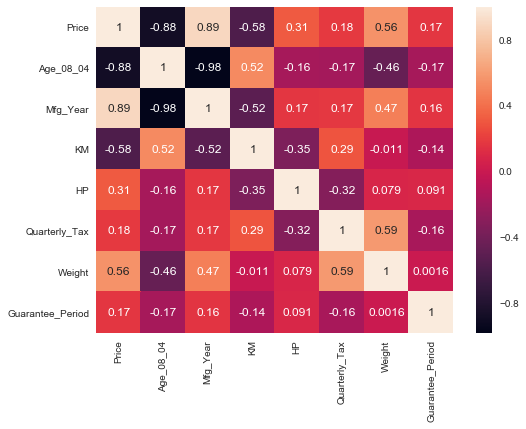

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)

In [19]:
def check_pearsonr(y, X):
    result = sp.stats.pearsonr(y, X)
    print("rho : {}  ,  p-value : {}".format(result[0], result[1]))

In [20]:
check_pearsonr(df.Price, df.Age_08_04)

rho : -0.8838999759614311  ,  p-value : 0.0


In [21]:
check_pearsonr(df.Price, df.Mfg_Year)

rho : 0.8933019763297112  ,  p-value : 0.0


In [22]:
check_pearsonr(df.Price, df.KM)

rho : -0.5759618521644574  ,  p-value : 4.2103663413920063e-91


In [23]:
check_pearsonr(df.Price, df.HP)

rho : 0.31489825814758804  ,  p-value : 6.828503623706392e-25


In [24]:
check_pearsonr(df.Price, df.Quarterly_Tax)

rho : 0.17887374583572183  ,  p-value : 8.956625863366135e-09


In [25]:
check_pearsonr(df.Price, df.Weight)

rho : 0.5570148710526482  ,  p-value : 4.179398149858485e-84


In [26]:
check_pearsonr(df.Price, df.Guarantee_Period)

rho : 0.16614089142820712  ,  p-value : 9.601091933171701e-08


In [27]:
check_pearsonr(df.Age_08_04, df.Mfg_Year)

rho : -0.9842181751617192  ,  p-value : 0.0


In [28]:
check_pearsonr(df.Age_08_04, df.KM)

rho : 0.5164863684775499  ,  p-value : 1.452674793893053e-70


In [29]:
check_pearsonr(df.Mfg_Year, df.KM)

rho : -0.5179806156884108  ,  p-value : 4.95313980028576e-71


# t-test

In [30]:
df_cat = pd.concat([dfy.Price, dfX_cat], axis=1)
df_cat.head()

,Price,CC,Doors,Cylinders,Gears,Mfg_Month,Fuel_Type,Met_Color,Color,Automatic,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,2000,3,4,5,10,Diesel,1,Blue,0,...,1,1,0,0,0,1,0,0,0,0
1,13750,2000,3,4,5,10,Diesel,1,Silver,0,...,0,1,0,0,0,1,0,0,0,0
2,13750,2000,3,4,5,3,Diesel,0,Black,0,...,1,1,0,1,0,1,0,0,0,0
3,20950,1800,3,4,6,8,Petrol,0,Silver,0,...,1,1,0,0,0,0,1,0,0,0
4,19600,1800,3,4,6,8,Petrol,0,Red,0,...,1,1,0,1,1,1,1,0,0,0


In [31]:
for col in dfX_cat.columns:
    print("%-17s : %s" % (col, df[col].unique()))

CC                : [ 2000  1800  1600  1400  1598 16000  1995  1900  1300  1398  1332  1587]
Doors             : [3 5 4 2]
Cylinders         : [4]
Gears             : [5 6]
Mfg_Month         : [10  3  8  2  5  9  4  6  7  1 11 12]
Fuel_Type         : ['Diesel' 'Petrol' 'CNG']
Met_Color         : [1 0]
Color             : ['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'White' 'Yellow' 'Violet'
 'Beige']
Automatic         : [0 1]
Mfr_Guarantee     : [0 1]
BOVAG_Guarantee   : [1 0]
ABS               : [1 0]
Airbag_1          : [1 0]
Airbag_2          : [1 0]
Airco             : [0 1]
Automatic_airco   : [0 1]
Boardcomputer     : [1 0]
CD_Player         : [0 1]
Central_Lock      : [1 0]
Powered_Windows   : [1 0]
Power_Steering    : [1 0]
Radio             : [0 1]
Mistlamps         : [0 1]
Sport_Model       : [0 1]
Backseat_Divider  : [1 0]
Metallic_Rim      : [0 1]
Radio_cassette    : [0 1]
Parking_Assistant : [0 1]
Tow_Bar           : [0 1]


In [32]:
df_cat = df_cat.drop('Cylinders', axis=1)

In [33]:
tmp_list = df['Airco'].unique()
tmp_list

array([0, 1])

In [34]:
a = df['Price'][df['Airco'] == tmp_list[0]]
b = df['Price'][df['Airco'] == tmp_list[1]]

sp.stats.ttest_ind(a,b)

Ttest_indResult(statistic=-15.816105021217785, pvalue=1.5260436415245136e-50)

In [35]:
tmp_list = df['Doors'].unique()
tmp_list

array([3, 5, 4, 2])

In [36]:
a = df['Price'][df['Doors'] == tmp_list[0]]
b = df['Price'][df['Doors'] == tmp_list[1]]
c = df['Price'][df['Doors'] == tmp_list[2]]
d = df['Price'][df['Doors'] == tmp_list[3]]

In [37]:
sp.stats.f_oneway(a, b, c, d)

F_onewayResult(statistic=13.157426161496677, pvalue=1.9673598160670142e-08)

In [38]:
def box_and_ttest(feature):        
    tmp_list = df[feature].unique()
    
    if len(tmp_list) == 2:
        result = sp.stats.ttest_ind(df['Price'][df[feature] == tmp_list[0]], 
                                    df['Price'][df[feature] == tmp_list[1]])
        statistics = result[0]
        pvalue = result[1]
        
        print(result)
        
    else:
        pass
    
    with plt.style.context(('seaborn-white')):
        plt.figure(figsize=(4,3))
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")
        plt.title("t-statistics : %.4f, p-value : %.8f" % (statistics, pvalue))

Ttest_indResult(statistic=-1.7072063434480571, pvalue=0.088088936482953129)


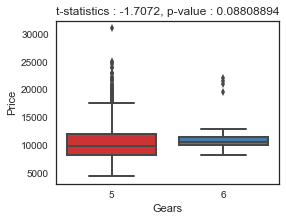

In [39]:
box_and_ttest("Gears")

Ttest_indResult(statistic=4.9321888011522619, pvalue=9.4929692835439989e-07)


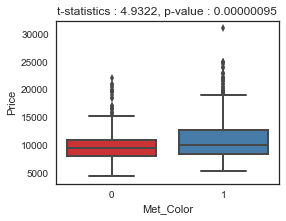

In [40]:
box_and_ttest("Met_Color")

Ttest_indResult(statistic=-2.175595606130607, pvalue=0.029815204892556121)


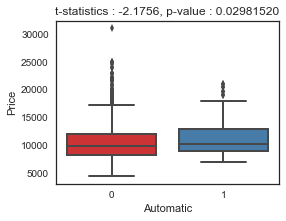

In [41]:
box_and_ttest("Automatic")

In [42]:
def five_boxes_and_ttests(*args):
    
    with plt.style.context(('seaborn-white')):
        plt.subplots(1, 5, figsize=(12, 2.5), sharey=True)
        
        for i, arg in enumerate(args):
            tmp_list = df[arg].unique()
            result = sp.stats.ttest_ind(df['Price'][df[arg] == tmp_list[0]], 
                                        df['Price'][df[arg] == tmp_list[1]])
            statistics = result[0]
            pvalue = result[1]

            plt.subplot(1, 5, i+1)
            sns.boxplot(x=dfX[arg], y=dfy['Price'], palette="Set3")

            plt.title("t : %.4f, p-val : %.4f" % (statistics, pvalue))
            plt.yticks([])

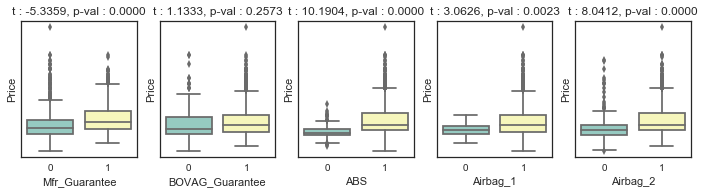

In [43]:
five_boxes_and_ttests("Mfr_Guarantee", "BOVAG_Guarantee", "ABS", "Airbag_1", "Airbag_2")

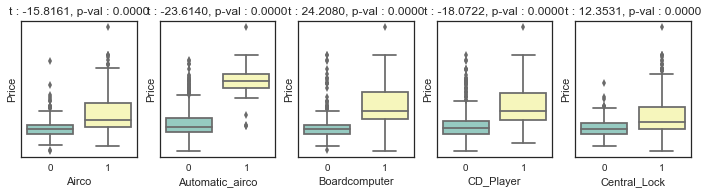

In [44]:
five_boxes_and_ttests("Airco", "Automatic_airco", "Boardcomputer", "CD_Player", "Central_Lock")

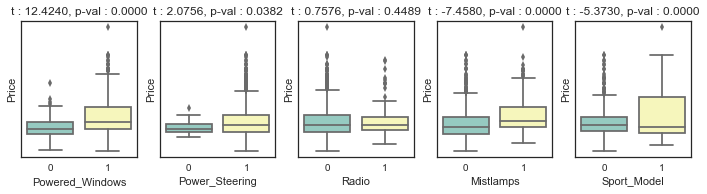

In [45]:
five_boxes_and_ttests("Powered_Windows", "Power_Steering", "Radio", "Mistlamps", "Sport_Model")

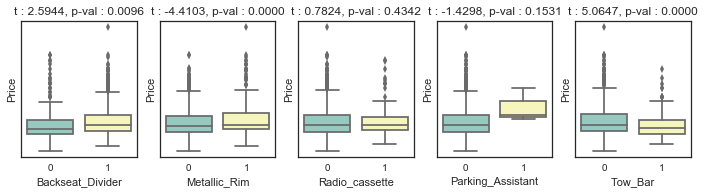

In [46]:
five_boxes_and_ttests("Backseat_Divider", "Metallic_Rim", "Radio_cassette", "Parking_Assistant", "Tow_Bar")

In [48]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        plt.figure(figsize=(4, 3))
        sns.boxplot(x=dfX[feature], y=dfy['Price'], linewidth=2, palette="Set1")

In [49]:
def get_array(feature):
    tmp_list = df[feature].unique()
    arr_list = []
    
    for i in range(len(tmp_list)):
        
        if type(tmp_list[i]) == str:
            exec("array = df['Price'][df['%s'] == '%s'].values" % (feature, tmp_list[i]))
        else:
            exec("array = df['Price'][df['%s'] == %d].values" % (feature, tmp_list[i]))
        exec("arr_list.append(array)")

    return arr_list

12


F_onewayResult(statistic=18.817084890556441, pvalue=1.3678616391172345e-34)

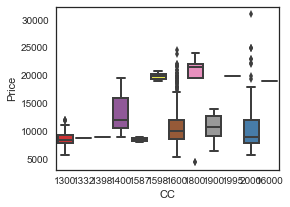

In [50]:
display_boxplot('CC')
arr = get_array('CC')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10], arr[11])

4


F_onewayResult(statistic=13.157426161496677, pvalue=1.9673598160670142e-08)

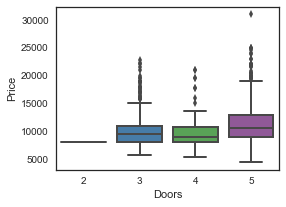

In [51]:
display_boxplot('Doors')
arr = get_array('Doors')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3])

12


F_onewayResult(statistic=1.5786619529848631, pvalue=0.099474951295375993)

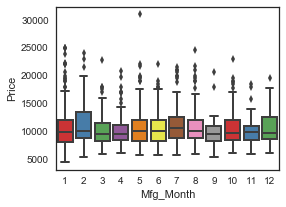

In [53]:
display_boxplot('Mfg_Month')
arr = get_array('Mfg_Month')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10], arr[11])

3


F_onewayResult(statistic=0.2580949965666503, pvalue=0.77257247583343869)

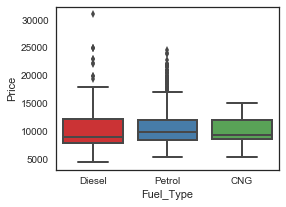

In [54]:
display_boxplot('Fuel_Type')
arr = get_array('Fuel_Type')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2])

10


F_onewayResult(statistic=6.4992939839072186, pvalue=4.9278984813640487e-09)

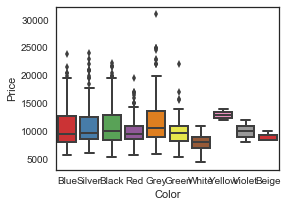

In [55]:
display_boxplot('Color')
arr = get_array('Color')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9])

11


F_onewayResult(statistic=41.821554352070997, pvalue=2.2391209733572494e-69)

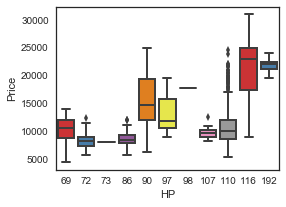

In [56]:
display_boxplot('HP')
arr = get_array('HP')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8], arr[9], arr[10])

9


F_onewayResult(statistic=7.6269348951481257, pvalue=6.0605549363256298e-10)

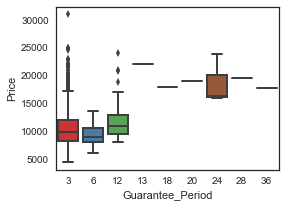

In [57]:
display_boxplot('Guarantee_Period')
arr = get_array('Guarantee_Period')
print(len(arr))
sp.stats.f_oneway(arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8])

In [58]:
def display_violinplot(feature):
    with plt.style.context(('seaborn-white')):
        plt.figure(figsize=(4, 3))
        ax = sns.violinplot(x=dfX[feature], y=dfy['Price'], palette="Set1", inner=None)

In [59]:
def display_multi_violinplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.violinplot(x=dfX[cols_cat[start_idx + num]], y=dfy['Price'], palette="Set3", ax=ax)
            except:
                pass

In [60]:
# 5개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'Quarterly_Tax', 'Weight']
# 31개 변수 ( 'HP', 'Guarantee_Period' 추가함 )
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'HP', 'Guarantee_Period']

print(len(cols_real), len(cols_cat))

5 31


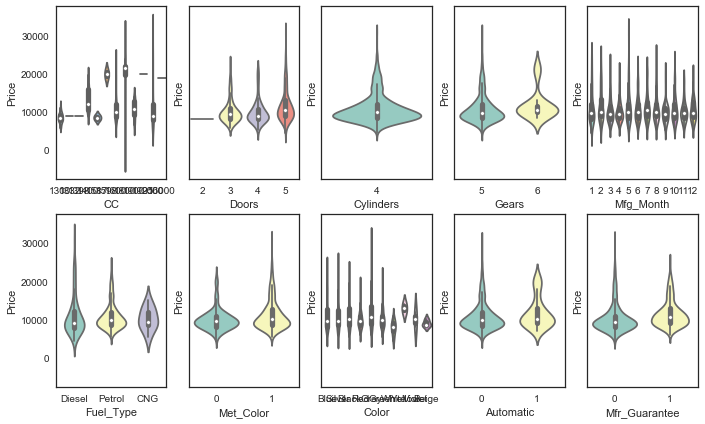

In [61]:
display_multi_violinplots('CC', 2, 5)

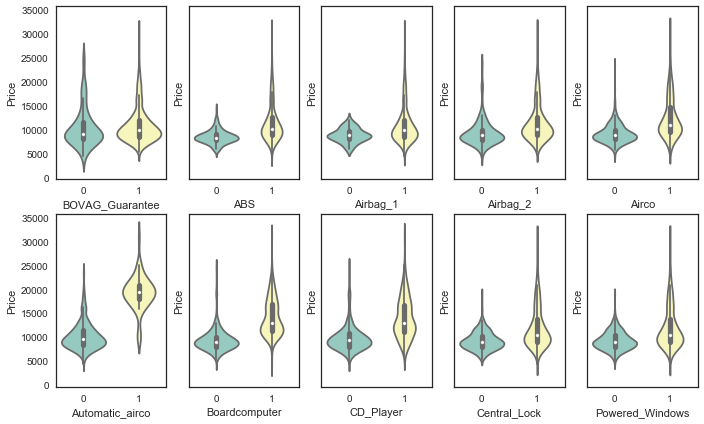

In [62]:
display_multi_violinplots('BOVAG_Guarantee', 2, 5)

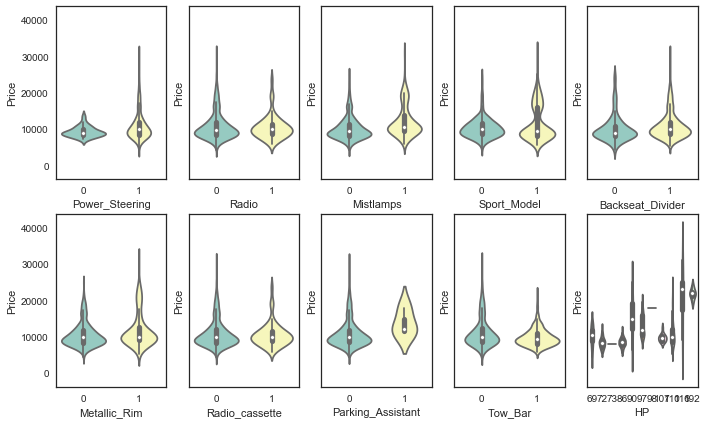

In [63]:
display_multi_violinplots('Power_Steering', 2, 5)

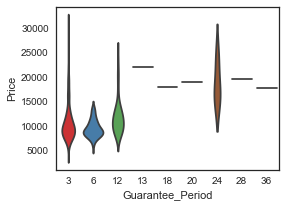

In [64]:
display_violinplot('Guarantee_Period')